In [ ]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Operator
from qiskit.circuit.library import CCZGate
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt
from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler.passes import BasisTranslator
from qiskit import transpile

In [104]:
P = np.arcsin(np.sqrt(2/3))
PI = np.pi

In [57]:
backend = Aer.get_backend('qasm_simulator')
backend_options = {'method': 'statevector'}

In [58]:
def run_simulation(quantum_circuit, backend_options=backend_options, noise_model=None, name='psi_1'):
    job = backend.run(quantum_circuit, run_options=backend_options, noise_model=noise_model)
    result    = job.result()
    psi_out = result.data(0)[name]
    return psi_out.probabilities_dict()["000"]

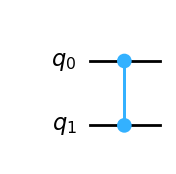

In [392]:
qc3 = QuantumCircuit(2)
qc3.cz(0, 1)
qc3.draw("mpl")

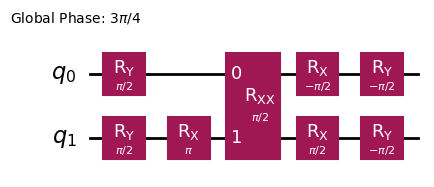

In [422]:
allowed_gates = ['rxx', 'rx', 'ry']

transpiled_qc = transpile(qc3, basis_gates=allowed_gates)
transpiled_qc.draw('mpl')

In [409]:
Operator(transpiled_qc).equiv(qc4)

True

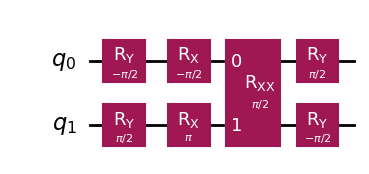

In [410]:
a = 1
qc4 = QuantumCircuit(2)
qc4.ry(-PI/2, 0)
qc4.ry(a * PI/2, 1)

qc4.rx(-PI/2, 0)
qc4.rx(a * PI, 1)

qc4.rxx(a * PI/2, 0, 1)

# qc4.rx(a * -PI/2, 0)
# qc4.rx(a * PI/2, 1)

qc4.ry(PI/2, 0)
qc4.ry(-a * PI/2, 1)


qc4.draw("mpl")



In [478]:
op = Operator(qc4)
op2 = Operator(qc3)
print(op.equiv(op2))


False


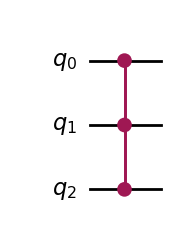

In [218]:
ccz = CCZGate()
qc = QuantumCircuit(3)

qc.append(ccz, [0, 1, 2])
# qc.save_statevector(label='psi_out')
qc.draw("mpl")

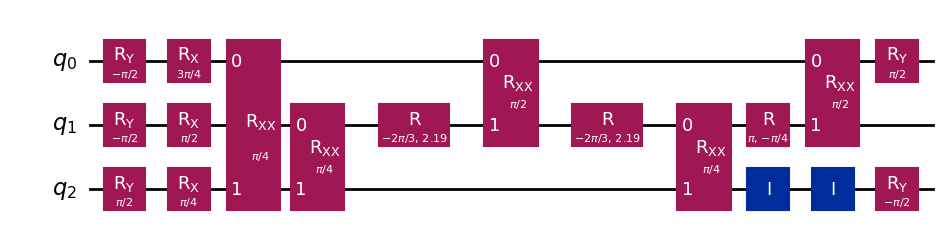

In [479]:
qc2 = QuantumCircuit(3)

qc2.ry(-PI / 2, 0)
qc2.ry(-PI / 2, 1)
qc2.ry(PI / 2, 2)

qc2.rx(3*PI / 4, 0)
qc2.rx(PI / 2, 1)
qc2.rx(PI / 4, 2)

qc2.rxx(PI / 4, 0, 2)

qc2.rxx(PI / 4, 1, 2)

qc2.r(-2*PI / 3, PI-P, 1)

qc2.rxx(PI / 2, 0, 1)

qc2.r(-2*PI / 3, PI - P, 1)
qc2.rxx(PI / 4, 1, 2)
qc2.r(PI, -PI / 4, 1)
qc2.rxx(PI / 2, 0, 1)
qc2.id(2)
qc2.id(2)
qc2.ry(PI / 2, 0)
qc2.ry(-PI / 2, 2)



# qc2.save_statevector(label='psi_out')
qc2.draw("mpl")

In [480]:
op_qc = Operator(qc)
op_qc2 = Operator(qc2)

In [482]:
print(op_qc2.data/op_qc2.data[0][0])


[[ 1.00000000e+00-0.00000000e+00j  8.00394190e-17+1.19102150e-17j
   1.21992053e-16+1.40658018e-16j -4.21089689e-18+2.82982080e-17j
  -4.24863958e-17+1.02571233e-16j -5.69384722e-33-2.35846874e-33j
  -1.59323984e-17+3.84642123e-17j  2.34430031e-17-2.03320088e-17j]
 [-7.51060464e-18+1.81322036e-17j  1.00000000e+00-5.12856164e-17j
  -1.06215989e-17+2.56428082e-17j -1.08227081e-16+3.15679898e-16j
  -5.12856164e-17+2.12431979e-17j -4.06640175e-17-4.68860061e-17j
  -1.59323984e-17+3.84642123e-17j  4.06640175e-17+4.68860061e-17j]
 [ 7.49173330e-17+9.11166125e-17j -4.79859087e-17+2.51872137e-17j
   1.00000000e+00-0.00000000e+00j  6.63068257e-17-5.75076051e-17j
  -1.72210144e-17-6.72180149e-17j -1.92321062e-17-7.96619921e-18j
  -1.06215989e-17+2.56428082e-17j  3.62644072e-17+1.50212093e-17j]
 [ 5.76963185e-17+2.38985976e-17j -3.88092611e-17+3.29412491e-16j
  -9.50606283e-17+2.43541922e-17j  1.00000000e+00+3.58999315e-16j
   7.69284247e-17+3.18647968e-17j -2.98537051e-17+1.76766090e-17j
  -3.62

In [474]:
def r(theta, phi):
    return np.array([
        [np.cos(theta/2), -1j* np.exp(-1j * phi)* np.sin(theta/2)],
        [-1j* np.exp(1j * phi)* np.sin(theta/2), np.cos(theta/2)],
    ])

def rx(theta):
    return r(theta, 0)

def ry(theta):
    return r(theta, PI/2)

def rz(theta):
    return ry(-PI/2) @ rx(theta) @ ry(PI/2)

def rxx(X):
    return np.array([
        [np.cos(X), 0, 0, -1j * np.sin(X)],
        [0, np.cos(X), -1j * np.sin(X), 0],
        [0, -1j * np.sin(X), np.cos(X),  0],
        [-1j * np.sin(X), 0, 0, np.cos(X)]
    ])

def i():
    return np.array([
        [1, 0],
        [0, 1]
    ])

def swap():
    return np.array([
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1]
    ])



In [ ]:
# CNOT
s1 = np.kron(ry(PI/2), i())
s2 = rxx(PI/4)
s3 = np.kron(ry(-PI/2), rx(-PI/2))
s4 = np.kron(rz(-PI/2), i())
print((s4 @ s3 @ s2 @ s1)*np.exp(-1j * PI/4))

[[ 1.00000000e+00+8.86511593e-17j  8.71576399e-33+3.39907768e-33j
   1.17756934e-16+8.63614149e-18j -1.11022302e-16-9.84225582e-33j]
 [ 8.71576399e-33+3.39907768e-33j  1.00000000e+00+8.86511593e-17j
  -1.11022302e-16-9.84225582e-33j  1.17756934e-16+8.63614149e-18j]
 [ 6.93889390e-17+1.38777878e-17j -6.70078871e-17-4.21129058e-17j
  -1.38777878e-17-1.80411242e-16j  1.00000000e+00+8.86511593e-17j]
 [-6.70078871e-17-4.21129058e-17j  6.93889390e-17+1.38777878e-17j
   1.00000000e+00+8.86511593e-17j -1.38777878e-17-1.80411242e-16j]]


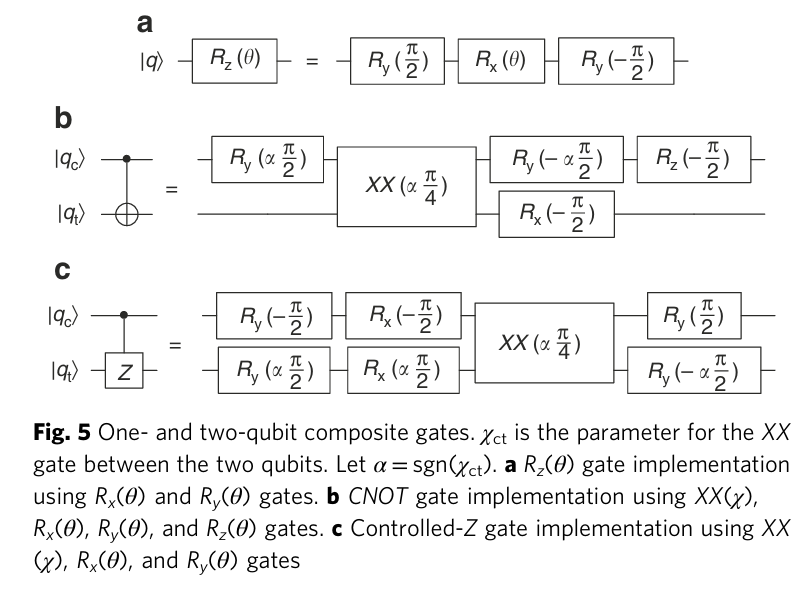

In [469]:
# CCNOT
stage_1 = np.kron(ry(-PI/2), ry(PI/2))
stage_2 = np.kron(rx(-PI/2), rx(PI/2))
stage_3 = rxx(PI/4)
stage_4 = np.kron(ry(PI/2), ry(-PI/2))

print((stage_4 @ stage_3 @ stage_2 @ stage_1)*np.exp( 1j *PI/4))
# print(stage_1 @ stage_2 @ stage_3 @ stage_4 )


[[ 1.00000000e+00+1.00875766e-16j  3.92523115e-17+8.63614149e-18j
  -1.96261557e-17+1.09900142e-17j -5.55111512e-17-8.68121782e-33j]
 [-1.62588398e-17-3.06161700e-17j  1.00000000e+00-8.86511593e-17j
  -1.12284941e-34+5.76096040e-33j -1.73268086e-16+3.06161700e-17j]
 [ 1.62588398e-17+3.06161700e-17j -1.12284941e-34+5.76096040e-33j
   1.00000000e+00+6.83580866e-17j  1.73268086e-16-3.06161700e-17j]
 [-5.55111512e-17+4.08415834e-32j -1.76635402e-16-5.02423257e-17j
   1.96261557e-16+6.98684814e-17j -1.00000000e+00+3.89200387e-16j]]


In [423]:
ry(-PI/2) @ rx(PI)

array([[ 8.65956056e-17-0.70710678j,  4.32978028e-17-0.70710678j],
       [-4.32978028e-17-0.70710678j,  8.65956056e-17+0.70710678j]])

In [477]:
P = np.arcsin(np.sqrt(2/3))
s1 = np.kron(ry(-PI/2),np.kron(ry(-PI/2), ry(PI/2)))
s2 = np.kron(rx(3*PI/4), np.kron(rx(PI/2), rx(PI/4)))
s3 = np.kron(i(), swap())
s4 = np.kron(rxx(PI/8), i())
s5 = np.kron(i(), swap())
s6 = np.kron(i(), rxx(PI/8))
s7 = np.kron(i(), np.kron(r(-2*PI/3, PI-P), i()))
s8 = np.kron(rxx(PI/4), i())
s9 = np.kron(i(), np.kron(r(-2*PI/3, PI-P), i()))
s10 = np.kron(i(), rxx(PI/8))
s11 = np.kron(i(), np.kron(r(PI, -PI/4), i()))
s12 = np.kron(rxx(PI/4), i())
s13 = np.kron(ry(PI/2), np.kron(i(), ry(-PI/2)))


print((s13 @ s12  @ s11 @ s10 @ s9 @ s8 @ s7 @ s6 @ s5 @ s4 @ s3 @ s2 @ s1)/ (-3.82683432e-01-9.23879533e-01j))

[[ 1.00000000e+00-5.24321628e-10j  4.04124026e-18+2.90300602e-17j
  -4.34166417e-17+2.97661609e-17j  3.56351326e-17-2.71414003e-17j
  -1.77738335e-17+4.03877598e-17j -5.94007402e-18+7.01213065e-19j
  -1.21921296e-17+6.80939158e-18j -8.28221101e-17+7.12053694e-18j]
 [-4.95988045e-17+1.11528517e-17j  1.00000000e+00-5.24321526e-10j
  -6.59484556e-17+3.90991438e-17j -2.64646129e-16+1.45036366e-16j
   6.80319795e-17+4.20214246e-17j -8.77237036e-17+8.02310430e-18j
  -7.18995398e-17-2.15669840e-17j -2.13704893e-17-2.36443573e-17j]
 [ 5.88536198e-17+3.28108736e-17j  3.97337715e-17-4.67586801e-18j
   1.00000000e+00-5.24321474e-10j -4.53455424e-17-4.31876088e-17j
   3.49948479e-17+5.58705711e-18j -4.48899479e-17-8.05519185e-17j
  -8.13987920e-18-9.00919674e-18j -1.80049122e-17+3.99541827e-17j]
 [-9.96697210e-17-2.84520337e-17j  1.11995705e-16+2.96556151e-17j
   5.60493323e-17-7.27081513e-17j  1.00000000e+00-5.24321372e-10j
   4.14055500e-17+7.14382882e-17j -3.62794406e-17+1.62529203e-17j
   4.15

In [ ]:
[[ 1.00000000e+00-5.24321628e-10j  4.04124026e-18+2.90300602e-17j -4.34166417e-17+2.97661609e-17j  3.56351326e-17-2.71414003e-17j  -1.77738335e-17+4.03877598e-17j -5.94007402e-18+7.01213065e-19j  -1.21921296e-17+6.80939158e-18j -8.28221101e-17+7.12053694e-18j]
 [-4.95988045e-17+1.11528517e-17j  1.00000000e+00-5.24321526e-10j  -6.59484556e-17+3.90991438e-17j -2.64646129e-16+1.45036366e-16j   6.80319795e-17+4.20214246e-17j -8.77237036e-17+8.02310430e-18j  -7.18995398e-17-2.15669840e-17j -2.13704893e-17-2.36443573e-17j]
 [ 5.88536198e-17+3.28108736e-17j  3.97337715e-17-4.67586801e-18j   1.00000000e+00-5.24321474e-10j -4.53455424e-17-4.31876088e-17j   3.49948479e-17+5.58705711e-18j -4.48899479e-17-8.05519185e-17j  -8.13987920e-18-9.00919674e-18j -1.80049122e-17+3.99541827e-17j]
 [-9.96697210e-17-2.84520337e-17j  1.11995705e-16+2.96556151e-17j   5.60493323e-17-7.27081513e-17j  1.00000000e+00-5.24321372e-10j   4.14055500e-17+7.14382882e-17j -3.62794406e-17+1.62529203e-17j   4.15902401e-17-2.90743244e-17j -1.61962638e-16+5.23199923e-17j]
 [-1.23121734e-18-3.45353354e-18j  2.78235566e-17+2.40779345e-17j  -7.95647676e-17-7.95682263e-18j  3.77267032e-17+1.01090993e-17j   1.00000000e+00-5.24321679e-10j -3.84850343e-18+3.79517127e-17j  -6.97478351e-17+5.02369638e-16j -3.65145427e-17-2.41528379e-17j]
 [ 6.94752187e-17-1.66523646e-17j  4.98997759e-17-1.67747964e-17j   1.42072446e-17+4.33287938e-17j -2.67577443e-17-6.42420932e-17j   9.80763428e-18-1.85784216e-17j  1.00000000e+00-5.24321679e-10j  -1.39062732e-17+1.73560872e-17j -3.61071829e-16-1.71032845e-16j]
 [ 1.36426297e-16-6.65081801e-17j  8.28820056e-19-1.81448444e-17j  -1.67612184e-17+8.72252267e-17j  5.64342699e-18-8.59786638e-18j  -9.29347891e-17+4.16182123e-16j -5.45195777e-17+6.41196614e-17j   1.00000000e+00-5.24321167e-10j  2.62978374e-16-1.51709674e-16j]
 [ 6.51495795e-17-3.98965229e-17j  7.11662320e-17-2.92749239e-17j  -8.80342208e-18-1.24889962e-17j -1.97053299e-16+9.61079009e-17j  -2.11692316e-17-5.51641054e-17j -4.34060562e-16+8.80635341e-17j   9.84260824e-17-3.93227715e-17j -1.00000000e+00+5.24321064e-10j]]